К алгоритму kNN, реализованному на уроке, реализовать добавление весов соседей по любому из показанных на уроке принципов. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от k (взять от 1 до 10) для выборки данных из данного урока.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

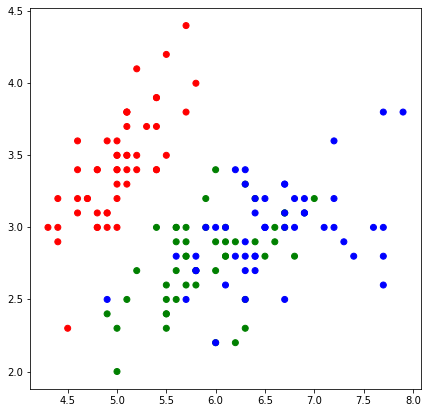

In [3]:
X, y = load_iris(return_X_y=True)
# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.show()

In [4]:
# Используем евклидову метрику. Реализуем функцию для ее подсчета.

def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [6]:
def knn(x_train, y_train, x_test, k, q):  #Добавлено q - устанавливаемое при запуске функции вручную
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes= {class_item: 0 for class_item in set(y_train)}

        # Сортируем список и среди первых k элементов посчитаем сумму весов классов ближайших соседей
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += q ** d[0]  # Вместо прибавления 1, прибавляем вес признака в словарь по ближайшим соседям
    
        # Записываем в список ответов класс, который по сумме весов оказывает большее влияние на соседа
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [8]:
for k in range(2, 11):
    y_pred = knn(X_train, y_train, X_test, k, 0.5)
    print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')


Точность алгоритма при k = 2: 0.733
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 4: 0.767
Точность алгоритма при k = 5: 0.867
Точность алгоритма при k = 6: 0.867
Точность алгоритма при k = 7: 0.800
Точность алгоритма при k = 8: 0.833
Точность алгоритма при k = 9: 0.867
Точность алгоритма при k = 10: 0.867


In [9]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

In [10]:
def kmeans(data, k, max_iterations, min_distance):    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}
        
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесём объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения с новыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [11]:
def quality(centroids, clusters):
    cdist = 0  
    for key in clusters.keys():  
        dist = 0
        for point in clusters[key]: 
            dist += np.square(e_metrics(centroids[key], point))
        dist += dist/len(clusters[key]) 
    return round(dist, 2)

In [13]:
# максимальное количество итераций
max_iterations = 10
# минимальное расстояние между центроидами
min_distance = 1e-4

In [15]:
quality_arr = []
for k in range(1, 11):
    quality_arr.append(quality(*kmeans(X, k, max_iterations, min_distance)))

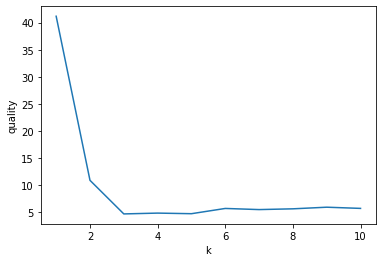

In [18]:
plt.xlabel('k')
plt.ylabel('quality')
plt.plot(np.arange(1, 11), quality_arr)
plt.show()